Note: you may need to restart the kernel to use updated packages.
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.99      0.98      0.99       102
           2       0.97      0.97      0.97        39

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\thili\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


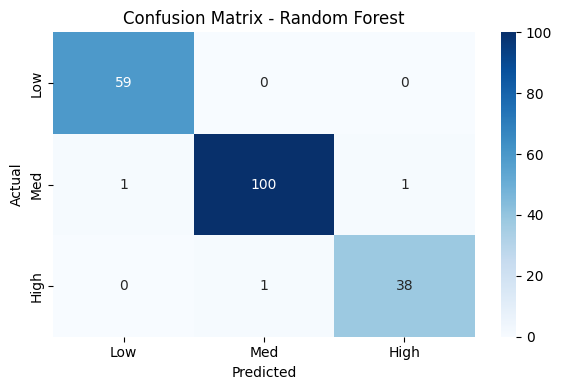

In [4]:
# 03_Modeling.ipynb

# imports
import sys
sys.path.append('../notebooks')  # so we can import from utils.py

from utils import load_student_data
%pip install scikit-learn matplotlib seaborn --quiet

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data with engineered features
df = load_student_data()

# define features and target
features = ['math score', 'reading score', 'writing score']
X = df[features]
y = df['performance_label']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Med', 'High'], yticklabels=['Low', 'Med', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔍 {name} Accuracy: {acc:.2f}")
    results[name] = {
        'model': clf,
        'accuracy': acc,
        'report': classification_report(y_test, y_pred, output_dict=True)
    }


🔍 Logistic Regression Accuracy: 1.00
🔍 Random Forest Accuracy: 0.98
🔍 Gradient Boosting Accuracy: 0.97


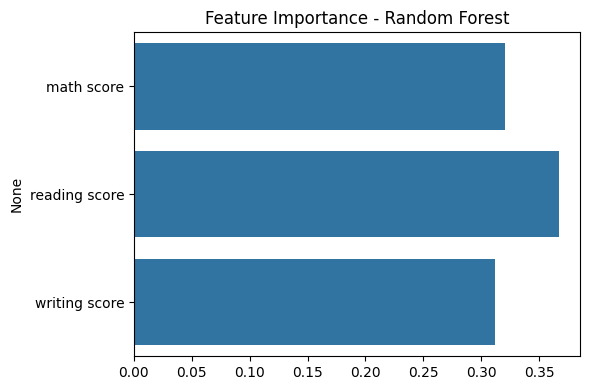

In [7]:
# Random Forest Feature Importance
importances = results["Random Forest"]["model"].feature_importances_
feature_names = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()
